In [12]:
import os
import warnings
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sankeyflow import Sankey

tqdm.pandas()
warnings.filterwarnings("ignore")

In [13]:
students_path = "./major_minor/students.csv"

In [14]:
df = pd.read_csv(students_path)
df

,batch,email,id,name,status,major,minor,program,grad,cgpa,mgpa
0,ASP 2017-18,aania_asp18@ashoka.edu.in,UG-14-1609,Aania,Graduated,NaN,NaN,ASP,2018.0,2.64,0.0
1,ASP 2017-18,aashna.lal_asp18@ashoka.edu.in,UG-14-0568,Aashna Lal,Graduated,NaN,CW,ASP,2018.0,3.36,0.0
2,ASP 2017-18,abhinav.srikant_asp18@ashoka.edu.in,UG-14-1833,Abhinav Srikant,Graduated,PSY,MS,ASP,2018.0,3.14,0.0
3,ASP 2017-18,aditya.prakash_asp18@ashoka.edu.in,UG-14-1812,Aditya Prakash,Graduated,NaN,MAT,ASP,2018.0,3.57,0.0
4,ASP 2017-18,ahan.bezbaroa_asp18@ashoka.edu.in,UG-14-0336,Ahan Bezbaroa,Graduated,PPE,ENG,ASP,2018.0,3.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7001,UG 2023-27,yuvakshi.dam_ug2023@ashoka.edu.in,1020231747,Yuvakshi Dam,Enrolled,NaN,NaN,UG,2027.0,3.22,0.0
7002,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027.0,3.19,0.0
7003,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027.0,0.00,0.0
7004,UG 2023-27,zahrah.imani_ug2023@ashoka.edu.in,1020231749,Zahrah Salim Imani,Enrolled,NaN,NaN,UG,2027.0,3.82,0.0


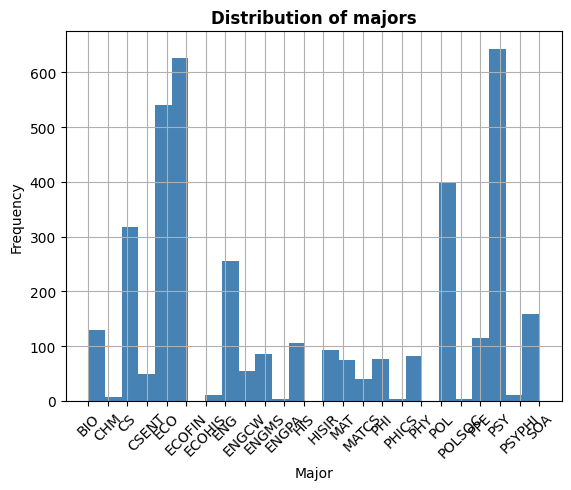

In [15]:
df = df.sort_values(by=['major'])

ax = df[df["program"] == "UG"]["major"].hist(bins=df["major"].nunique(), color="steelblue")
ax.set_title('Distribution of majors', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

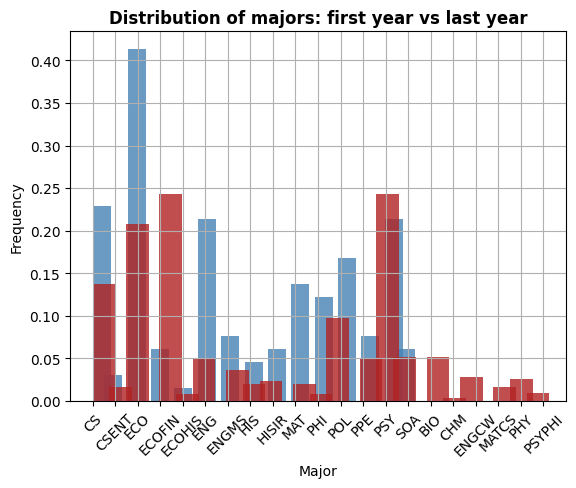

In [16]:
df = df.sort_values(by=["grad", "major"])

ax = df[df["batch"] == "UG 2014-17"]["major"].hist(bins=df["major"].nunique(), width=0.8, color="steelblue", density=True, alpha=0.8)
ax2 = df[df["batch"] == "UG 2021-24"]["major"].hist(bins=df["major"].nunique(), width=1, color="firebrick", density=True, alpha=0.8)
ax.set_title('Distribution of majors: first year vs last year', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

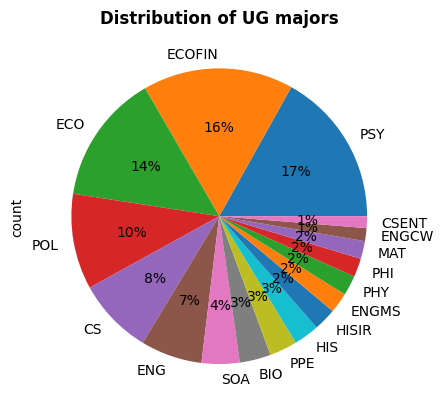

In [17]:
ax = df[df["program"] == "UG"]["major"].value_counts().iloc[:17].plot.pie(autopct='%1.0f%%')
ax.set_title('Distribution of UG majors', weight='bold')
plt.show()

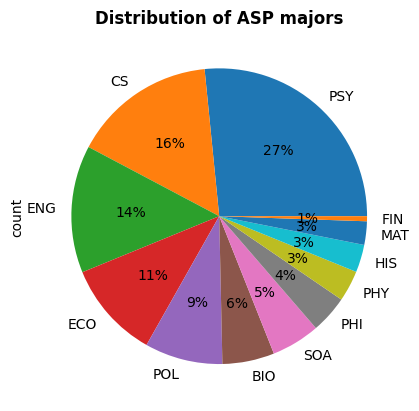

In [18]:
ax = df[df["program"] == "ASP"]["major"].value_counts().iloc[:12].plot.pie(autopct='%1.0f%%')
ax.set_title('Distribution of ASP majors', weight='bold')
plt.show()

In [19]:
ugs = df[df["program"] == "UG"]
asps = df[df["program"] == "ASP"]

asps["ug_grad"] = asps["grad"] - 1
asps["major"] = asps["major"] + " "
asps["minor"] = asps["minor"].apply(lambda x: x.replace(",", " ,") if (not pd.isna(x) and type(x) == str and "," in x) else x + " " if not pd.isna(x) else None)

In [20]:
people = pd.merge(ugs, asps, how="left", left_on=["name", "grad"], right_on=["name", "ug_grad"], suffixes=("_ug", "_asp"))
people["subject_asp"] = people.apply(lambda x: x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else x["major_asp"] if not pd.isna(x["major_asp"]) else None, axis=1)
people["major_asp"] = people.apply(lambda x: x["major_asp"] if not pd.isna(x["major_asp"]) else x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else None, axis=1)

people = people[~people["subject_asp"].isnull()]
# people = people[people["batch_ug"] == "UG 2021-24"]
people

,batch_ug,email_ug,id_ug,name,status_ug,major_ug,minor_ug,program_ug,grad_ug,cgpa_ug,...,id_asp,status_asp,major_asp,minor_asp,program_asp,grad_asp,cgpa_asp,mgpa_asp,ug_grad,subject_asp
1,UG 2014-17,shreyash.krishna@ashoka.edu.in,UG-14-2508,Shreyash Krishna,Graduated,CS,NaN,UG,2017.0,3.24,...,UG-14-2508,Graduated,CS,None,ASP,2018.0,3.73,0.0,2017.0,CS
3,UG 2014-17,vivek.madala@ashoka.edu.in,UG-14-1920,Deva Surya Vivek Madala,Graduated,CS,ECO,UG,2017.0,3.55,...,UG-14-1920,Graduated,CS,None,ASP,2018.0,3.55,0.0,2017.0,CS
4,UG 2014-17,yash.joshi@ashoka.edu.in,UG-14-2145,Yash Joshi,Graduated,CS,NaN,UG,2017.0,3.35,...,UG-14-2145,Graduated,CS,None,ASP,2018.0,3.35,0.0,2017.0,CS
5,UG 2014-17,shivangi.tikekar@ashoka.edu.in,UG-14-0166,Shivangi Tikekar,Graduated,CS,NaN,UG,2017.0,3.28,...,UG-14-0166,Graduated,CS,MS,ASP,2018.0,3.28,0.0,2017.0,MS
6,UG 2014-17,apuroop.sethupathy@ashoka.edu.in,UG-14-2469,Apuroop Sethupathy,Graduated,CS,ECO,UG,2017.0,3.06,...,UG-14-2469,Graduated,CS,None,ASP,2018.0,3.06,0.0,2017.0,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,UG 2021-24,ishan.shanavas_ug24@ashoka.edu.in,1020211183,Ishan Shanavas,Graduated,SOA,ES,UG,2024.0,3.75,...,1020211183,Enrolled,ENT,"ENT ,VA",ASP,2025.0,0.00,0.0,2024.0,ENT
3405,UG 2021-24,areeb.mansoor_ug24@ashoka.edu.in,1020211219,Areeb Mansoor,Graduated,SOA,HIS,UG,2024.0,3.58,...,1020211219,Enrolled,SOA,None,ASP,2025.0,0.00,0.0,2024.0,SOA
3406,UG 2021-24,arayna.dasgupta_ug24@ashoka.edu.in,1020211155,Arayna Dasgupta,Graduated,SOA,POL,UG,2024.0,3.66,...,1020211155,Enrolled,POL,None,ASP,2025.0,0.00,0.0,2024.0,POL
3408,UG 2021-24,aysha.joyce_ug24@ashoka.edu.in,1020211752,Aysha Joyce,Graduated,SOA,NaN,UG,2024.0,3.71,...,1020211752,Enrolled,SOA,ENG,ASP,2025.0,0.00,0.0,2024.0,ENG


In [21]:
level1 = sorted([(key, value) for key, value in people["major_ug"].value_counts().items()], key=lambda x: x[1], reverse=True)[:16]
level2 = sorted([(key, value) for key, value in people["subject_asp"].value_counts().items()], key=lambda x: x[1], reverse=True)[:22]
flows = list((people[["major_ug", "subject_asp"]].value_counts()).reset_index().apply(lambda x: (x["major_ug"], x["subject_asp"], x["count"]), axis=1))[:70]

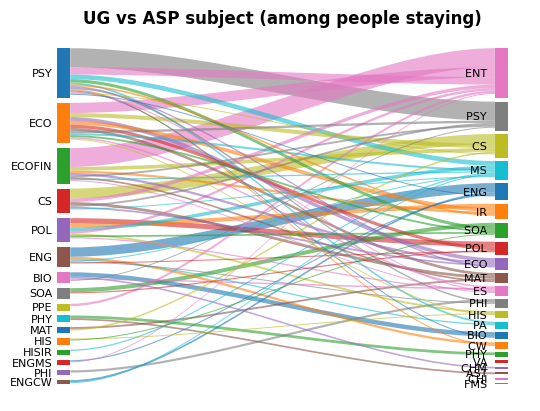

In [22]:
s = Sankey(flows=flows, nodes=[level1, level2],
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG vs ASP subject (among people staying)", weight="bold")
s.draw()

In [23]:
level1 = sorted([(key, value) for key, value in people["major_ug"].value_counts().items()], key=lambda x: x[1],
                reverse=True)
level2 = sorted([(key, value) for key, value in people["major_asp"].value_counts().items()], key=lambda x: x[1],
                reverse=True)
flows = list((people[["major_ug", "major_asp"]].value_counts()).reset_index().apply(
    lambda x: (x["major_ug"], x["major_asp"], x["count"]), axis=1))

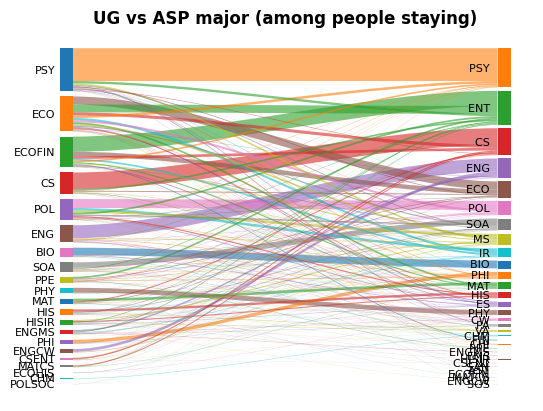

In [24]:
s = Sankey(flows=flows, nodes=[level1, level2],
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG vs ASP major (among people staying)", weight="bold")
s.draw()

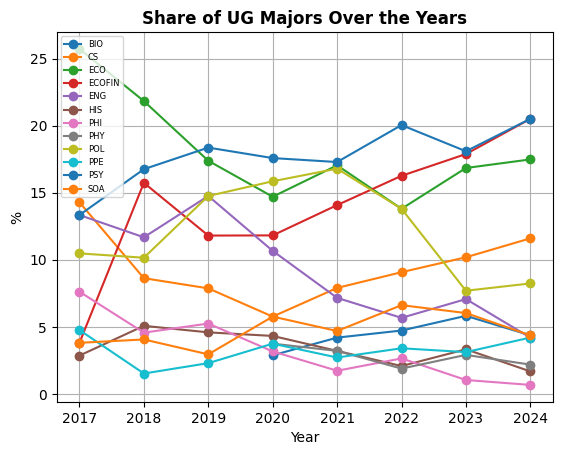

In [25]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG") & (df["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:12])))].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage')

pivot_df.plot(kind='line', marker='o')
plt.title('Share of UG Majors Over the Years', weight="bold")
plt.xlabel('Year')
plt.ylabel('%')
plt.legend(fontsize=6, loc="upper left")
plt.grid(True)
plt.show()